In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
from sklearn import datasets
breast_cancer=datasets.load_breast_cancer()

(426, 30) (143, 30)


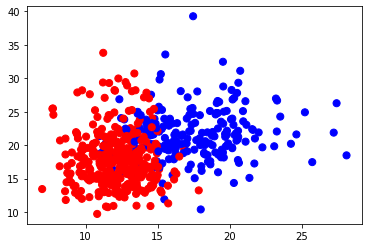

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
breast_cancer.target, random_state=132)
print(X_train.shape, X_test.shape)
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:, 1], c=breast_cancer.target, s=50, cmap='bwr')

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        57
           1       0.94      0.99      0.97        86

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
  stop = X_set[:, 0].max() + 1,
  step = 0.01),

  np.arange(start = X_set[:, 1].min() - 1,
  stop = X_set[:, 1].max() + 1,
  step = 0.01))
  # print(np.array([X1.ravel(),

  # X2.ravel()]).T.reshape(X.shape).shape)
  plt.contourf(X1, X2, clf.predict(X1.ravel().T.reshape(X.shape)),

  alpha = 0.75,
  cmap = zero_one_colourmap)

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = (zero_one_colourmap)(i), label = j)

  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

In [7]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax


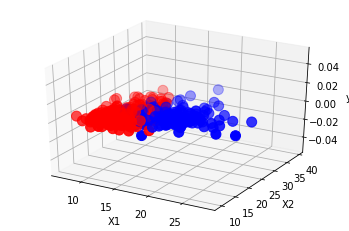

In [8]:
plot_3d_plot(X_train,y_train)

In [9]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [10]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        57
           1       0.86      0.97      0.91        86

    accuracy                           0.89       143
   macro avg       0.90      0.87      0.88       143
weighted avg       0.89      0.89      0.89       143



In [11]:
poly_classifier = SVC(kernel="poly",degree=3)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        57
           1       0.87      0.97      0.92        86

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143

